In [28]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_context('notebook')
sns.set_style('darkgrid')
import sklearn as skl
import sklearn.metrics
import sklearn.learning_curve
import sklearn.ensemble
import sklearn.dummy
import numpy as np

import sys
sys.path = sys.path + ['..']
import get_airbnb_data
import db
import learning
import imp
imp.reload(learning)
from learning import *

In [2]:
engine = db.create_root_engine()
rawtable = pd.io.sql.read_sql_table('listings', engine, index_col='id')
Xtr3, Xte3, ytr3, yte3 = get_training_test_set(rawtable, make_features=make_features3)

In [8]:
clf_dummy = get_dummy_clf()
clf_dummy.fit(Xtr3, ytr3)
skl.metrics.accuracy_score(yte3, clf_dummy.predict(Xte3))

0.61087420042643925

In [9]:
scaler = skl.preprocessing.StandardScaler()
clf = sklearn.ensemble.RandomForestClassifier(n_estimators=1000, criterion='gini', 
                                              max_features='auto', max_depth=None, # Can experiment with this to regularize
                                              n_jobs=4, class_weight='auto')
clf5 = skl.pipeline.Pipeline([
        ('scaler', scaler), ('clf', clf)])

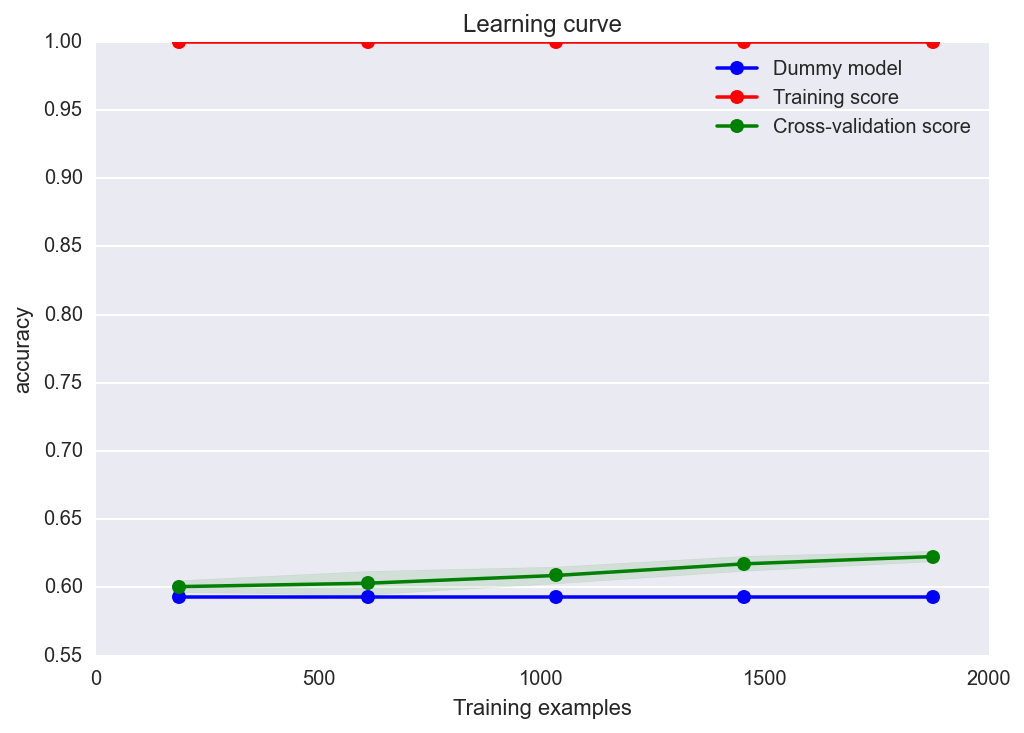

In [27]:
plot_learning_curve(clf5, "Learning curve", Xtr3, ytr3, dummy=clf_dummy)
plt.grid(True, 'both', 'y')

<module 'matplotlib.pyplot' from '/home/ibuder/anaconda3/lib/python3.4/site-packages/matplotlib/pyplot.py'>

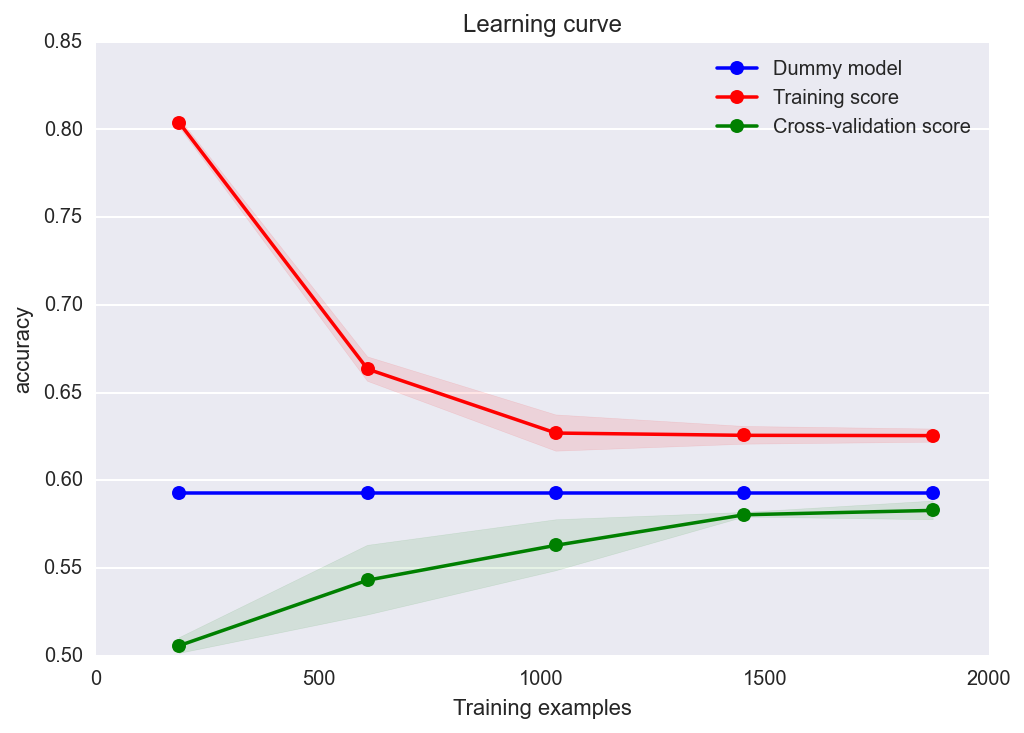

In [29]:
clf1 = get_logistic_regression_clf1()
plot_learning_curve(clf1, "Learning curve", Xtr3, ytr3, dummy=clf_dummy)

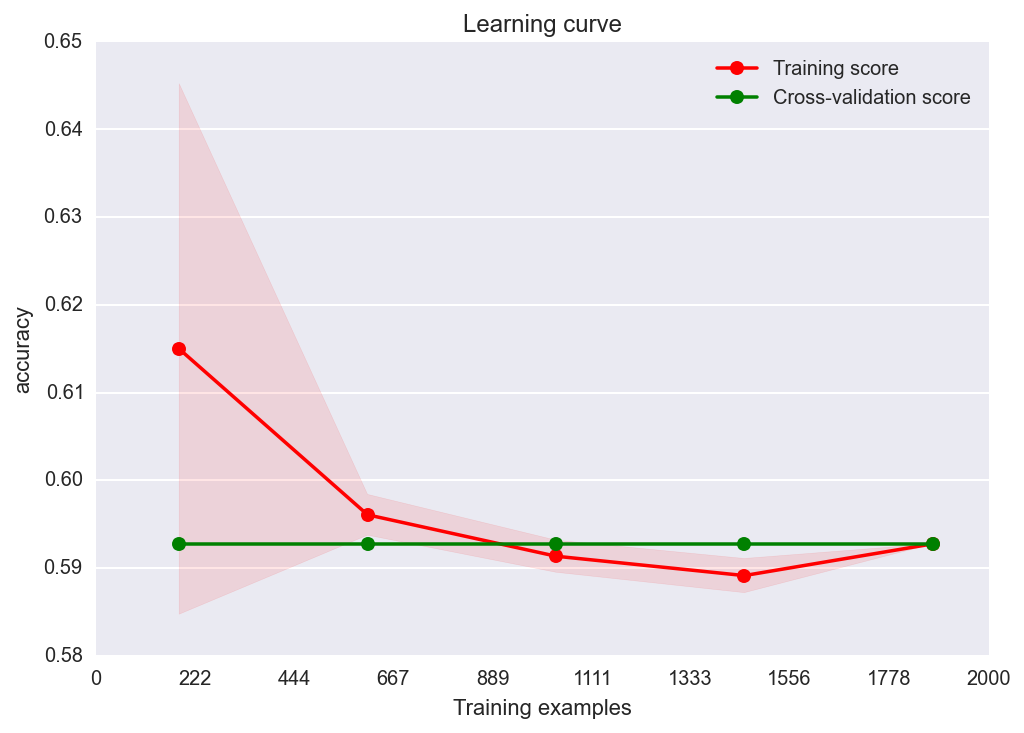

In [26]:
plot_learning_curve(clf_dummy, "Learning curve", Xtr3, ytr3)
ax = plt.axes()
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.linspace(start, end, 10))
plt.grid(True, 'both', 'y')